In [14]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.decision_tree import DecisionTree, DecisionTreeNode
from models.null_model import NullModelClassification
from src.cross_validation import CrossValidation
from src.evaluation import Evaluation
import numpy as np

config = breast_cancer_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [15]:
raw_data = data_processor.load_data()

data_1 = data_processor.impute_missing_values(raw_data)

data_2 = data_1.drop(columns=['Sample code number'])

data_3 = data_processor.encode_nominal_features(data_2)

data_4 = data_processor.encode_ordinal_features(data_3)

data_5 = data_processor.standardize_data(data_4,data_4,features=['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses'])

c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:47: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work becaus

In [16]:
data_train, data_val = cross_validator.random_partition(data_5, random_state=42)

In [17]:
data_train

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class_2,Class_4
82,0.206788,-0.371782,-0.742767,-0.632794,-0.549168,-0.706485,-0.179534,-0.611387,-0.343666,1,0
51,0.206788,-0.044070,-0.069800,0.417854,-0.549168,0.126419,-0.179534,0.371049,-0.343666,0,1
220,-1.213798,-0.699494,-0.742767,-0.282578,-0.549168,-0.706485,-0.179534,-0.611387,-0.343666,1,0
559,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.706485,-0.589645,-0.611387,-0.343666,1,0
544,-0.858651,-0.699494,-0.069800,-0.282578,-0.549168,-0.706485,-0.589645,-0.611387,-0.343666,1,0
...,...,...,...,...,...,...,...,...,...,...,...
71,0.561934,2.249915,-0.406284,1.818719,3.063712,-0.428851,1.460910,1.680964,4.903909,0,1
106,1.982519,2.249915,2.285586,1.818719,-0.549168,1.792229,0.230577,-0.611387,-0.343666,0,1
270,1.272227,0.283642,1.276135,-0.632794,-0.097558,1.792229,-0.179534,2.008442,0.239398,0,1
435,1.982519,1.594490,2.285586,-0.632794,-0.097558,1.792229,0.640688,-0.611387,-0.343666,0,1


In [18]:
data = data_train.to_numpy()
X = data[:,:-2]
y = data[:,-2:]

In [19]:
X.shape

(559, 9)

In [20]:
y.shape

(559, 2)

In [21]:
from models.neural_networks import FeedForwardNetwork

ffn = FeedForwardNetwork(config, n_input=X.shape[1],n_hidden_1=18,n_hidden_2=40,n_output=y.shape[1])

losses, final_acc = ffn.train(X,y,1000,0.01)

print(f"Final accuracy: {final_acc}")

Epoch 1/1000, Loss: 0.7572494541204343
Epoch 2/1000, Loss: 0.7939878126696943
Epoch 3/1000, Loss: 0.9641486647274393
Epoch 4/1000, Loss: 0.6090892478143268
Epoch 5/1000, Loss: 0.34713233335751714
Epoch 6/1000, Loss: 0.166642669492886
Epoch 7/1000, Loss: 0.11285533102002458
Epoch 8/1000, Loss: 0.09676861580784431
Epoch 9/1000, Loss: 0.09029875991342648
Epoch 10/1000, Loss: 0.08736607225578116
Epoch 11/1000, Loss: 0.08715483130882037
Epoch 12/1000, Loss: 0.09461047754536361
Epoch 13/1000, Loss: 0.10350091246331401
Epoch 14/1000, Loss: 0.1752139125501695
Epoch 15/1000, Loss: 0.08413616255348344
Epoch 16/1000, Loss: 0.08246953894225845
Epoch 17/1000, Loss: 0.08202651936301601
Epoch 18/1000, Loss: 0.08224829511604313
Epoch 19/1000, Loss: 0.08300105516346419
Epoch 20/1000, Loss: 0.08626917422807144
Epoch 21/1000, Loss: 0.08903005325995432
Epoch 22/1000, Loss: 0.10693689547403393
Epoch 23/1000, Loss: 0.0928066093824176
Epoch 24/1000, Loss: 0.11579585811122267
Epoch 25/1000, Loss: 0.0891876162

In [22]:
from models.neural_networks import LinearNetwork

linearnetwork = LinearNetwork(config)

losses = linearnetwork.logistic_regression(X,y,epochs=500,lr=0.01)

0.6948438000337664
0.4021628811844539
0.38237731876301095
0.36278810041313225
0.3433971332818008
0.32421564308465606
0.30527480239159827
0.2866428444497166
0.2684465025835064
0.25088374458062873
0.23419863226735171
0.21860006380598648
0.20418226509191242
0.1909469070278359
0.17889212969541327
0.16803905071080377
0.1583789346536597
0.14983489043192896
0.14229164769077554
0.13564392854830007
0.12981139776012182
0.12472264996977464
0.12029684464505017
0.11644307255144207
0.11307198157966807
0.11010481474405075
0.10747559169384018
0.10513006455880378
0.10302441307532735
0.10112411861471629
0.09940259202091944
0.09783946978698684
0.09641888090412432
0.09512799947008793
0.0939560048699975
0.09289340794116466
0.09193164142843138
0.09106282061109196
0.0902796075088475
0.0895751359644369
0.08894297056896881
0.08837708218283494
0.08787182943523744
0.0874219404916487
0.087022492997801
0.08666889249301823
0.08635685079438292
0.08608236608812754
0.08584170604338312
0.08563139453210157
0.08544820178

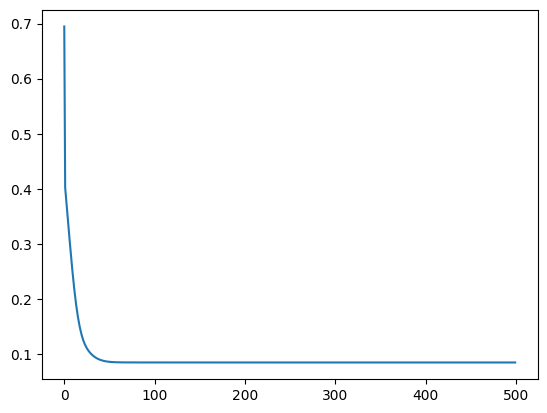

In [23]:
import matplotlib.pyplot as plt

plt.plot(losses)

In [24]:
data_test = data_val.to_numpy()
X_test = data_test[:,:-2]
y_test = data_test[:,-2:]

In [25]:
y_true = np.argmax(y_test,axis=1)
y_true

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [26]:
pred = linearnetwork.predict_logistic(X_test)

In [27]:
accuracy = np.mean(y_true==pred)

In [28]:
accuracy

0.9571428571428572